# Investigate a Dataset Project: No-show appointments
by Gerrit Tombrink

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset consists of information from 100k medical appointments in Brazil, which is part of a Nanodegree-Project by Udacity. You can find the original source on Kaggle (Name: "Medical Appointment No Shows", see: https://www.kaggle.com/joniarroba/noshowappointments ). In particular, this analysis deals with the question: What kind of patients do show up?

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### 1. General Properties

In the first step, we import the dataset. Please see below:

In [2]:
# Import dataset
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")


The print of the first five rows of the dataset exemplifies the shape of the different columns.
Please see below:

In [3]:
# Print dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Additionally, it is necessary to get further insights about the datatypes of all columns. Please see below:

In [4]:
# Find datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Result: It shows that the dataset consists of floats, integers and strings. The columns "SheduledDay" and "AppointmentDay" should be converted into the datetime data type. All column names are understandable (self-explanatory), but the hyphen of the column name "No-show" should be changed to the underline character "_". Additionally, the spelling of the columns "Hipertension" and "Handcap" should be corrected. All rows (110527 entries) of each column (14 columns) are filled with values. Consequently, it is not necessary to drop or fill values. In the following data cleaning section, you can find further details about this cleaning procedure.   

Furthermore, it is necessary to investigate duplicates:

In [5]:
# Find duplicates of the dataset
sum(df.duplicated())

0

Result: No duplicates of data exists.

In the next step we check the values for data with errors:

In [6]:
# Check values for data errors
print("Gender:", df.Gender.unique(), "\n")
print("Age:",sorted (df.Age.unique()), "\n")
print("Neighbourhood:", df.Neighbourhood.unique(), "\n")
print("Scholarship:", df.Scholarship.unique(), "\n")
print("Hipertension:", df.Hipertension.unique(), "\n")
print("Diabetes:", df.Diabetes.unique(), "\n")
print("Alcoholism:", df.Alcoholism.unique(), "\n")
print("Handcap:", df.Handcap.unique(), "\n")
print("SMS_received:", df.SMS_received.unique(), "\n")

Gender: ['F' 'M'] 

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115] 

Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'

Result: Within the column "Age" are outliers: The age "-1" is beyond our existence and even the age "115" might be an outlier. Consequently, these values should be deleted. In the following data cleaning section, you can find further details about this cleaning procedure.

Additionally, it is necessary to analyse the data in detail. Consequently the function "describe" should be used:

In [7]:
# Find statistical information of each variable (column)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Result: The table above gives us information about different statistical values for each column, which are filled with integer and float types. For example: the mean, minimum or maximum of the values.

To get an overview of the data we want to see the histograms for each column in the last step:

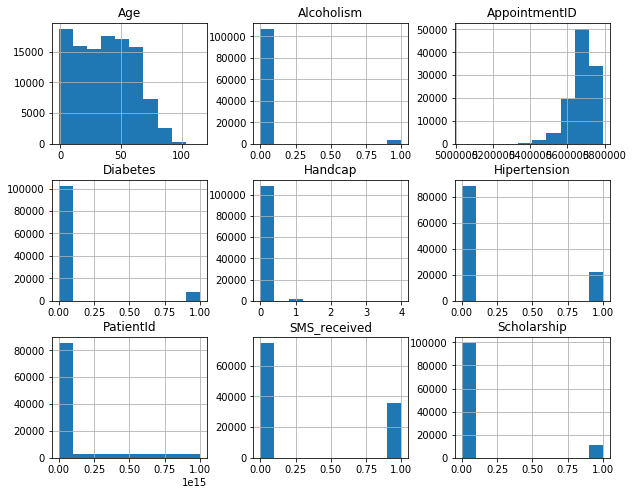

In [8]:
# Print histograms
df.hist(figsize=(10,8));

### 2. Data Cleaning: Conversion of the columns "SheduledDay" and "AppointmentDay", rename of the columns "No-show", "Hipertension" and "Handcap"  as well as cleaning of wrong values of the column "Age"

We have to converse special columns into datetime:

In [9]:
# Conversion of the columns into datetime
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

Result: The conversion into datetime helps to analyse the values of the two columns correctly.

We have to rename columns:

In [10]:
# Rename columns
df.rename(columns = {'No-show':'No_show','Hipertension': 'Hypertension', 'Handcap':'Handicap' }, inplace = True)

Result: Equal characters and correct spelling within the columns helps to understand the columns correctly.

We have to clean outliers of the column "Age":

In [11]:
# Cleaning of outliers
df = df[(df.Age >= 0) & (df.Age <= 105)]

Result: The cleaning of outliers helps to analyse the values of the column correctly.

Before we begin with the analysis we have to test the conversion-procedure and all values:

In [12]:
# Final test of the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hypertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handicap          110521 non-null int64
SMS_received      110521 non-null int64
No_show           110521 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


Result: The conversion-procedure is correct.

In [13]:
# Final test of all values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Result: All values are correct.

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question: What kind of patients do show up?

In the first step, it is necessary to mask show up patients (dependent variable). Please see below:

In [14]:
# Mask show up patients
df_show = df[df["No_show"] == "No"]

#### For the first analysis (see: plot), it is necessary to drop irrelevant and not data-consistent columns. Please see below:

In [15]:
# Drop columns of the dataset
df_show_counts1 = df_show.drop(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No_show', 'Age', 'Handicap', 'SMS_received'], axis=1)

Additionally, it is necessary to calculate the proportions of the values "0" and "1". Please see below:

In [16]:
# Calculate the sum of values "0" and "1"
counts_0 = np.sum(df_show_counts1 == 0)
counts_1 = np.sum(df_show_counts1 == 1)

# Calculate the total counts and proportions of values "0" and "1"
counts_total_0 = counts_0.sum()
counts_total_1 = counts_1.sum()
proportions_0 = counts_0 / counts_total_0 
proportions_1 = counts_1 / counts_total_1 

To get details about the proportions of the four selected columns, it is necessary to print them out:

In [17]:
# Print proportions of value "0"
proportions_0

Scholarship     0.251871
Hypertension    0.221160
Diabetes        0.257449
Alcoholism      0.269519
dtype: float64

In [18]:
# Print proportions of value "1"
proportions_1

Scholarship     0.233278
Hypertension    0.507731
Diabetes        0.183429
Alcoholism      0.075563
dtype: float64

Result: We can see the distribution of proportions for the four selected columns (variables). For the value "0" the most influencing variable is "Alcoholism". For the value "1" it is the variable "Hypertension". All results of these variables are dependent on the selected "No" masked variable "No_show". 

To get further insights, it is necessary to plot the results of the calculated "proportions_0" and "proportions_1". Please see below:

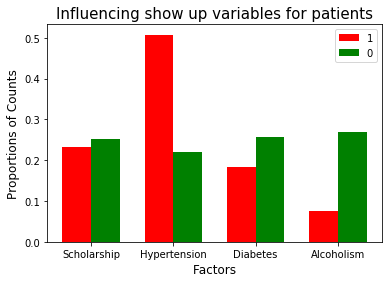

In [19]:
# Plot proportions of values "0" and "1"

# Calculate the x locations for both variables
ind = np.arange(len(proportions_1))  
# The width of the bars
width = 0.35       
# Plot both bars
red_bars = plt.bar(ind, proportions_1, width, color='r')
green_bars = plt.bar(ind + width, proportions_0, width, color='g')

# Title and labels
plt.xticks(ind , proportions_1.keys())
plt.legend(('1','0'))
plt.ylabel('Proportions of Counts', fontsize=12)
plt.xlabel('Factors', fontsize=12)
plt.title('Influencing show up variables for patients', fontsize=15)
# Xtick of locations
locations = ind + width / 2  
plt.xticks(locations);
plt.show();

Result: We can see the visualization of proportions for the four selected columns (variables). The most influencing variable of all bars is the disease "Hypertension". It has a proportion-value of 0.507731 (see red bar). All results of these variables are dependent on the selected "No" masked variable "No_show".

#### For the second analysis (see: plot), we calculate the value-counts of the variable "Neighbourhood" and plot the distribution of proportions of them. The results are dependent on the selected "No" masked variable "No_show". Please see below:

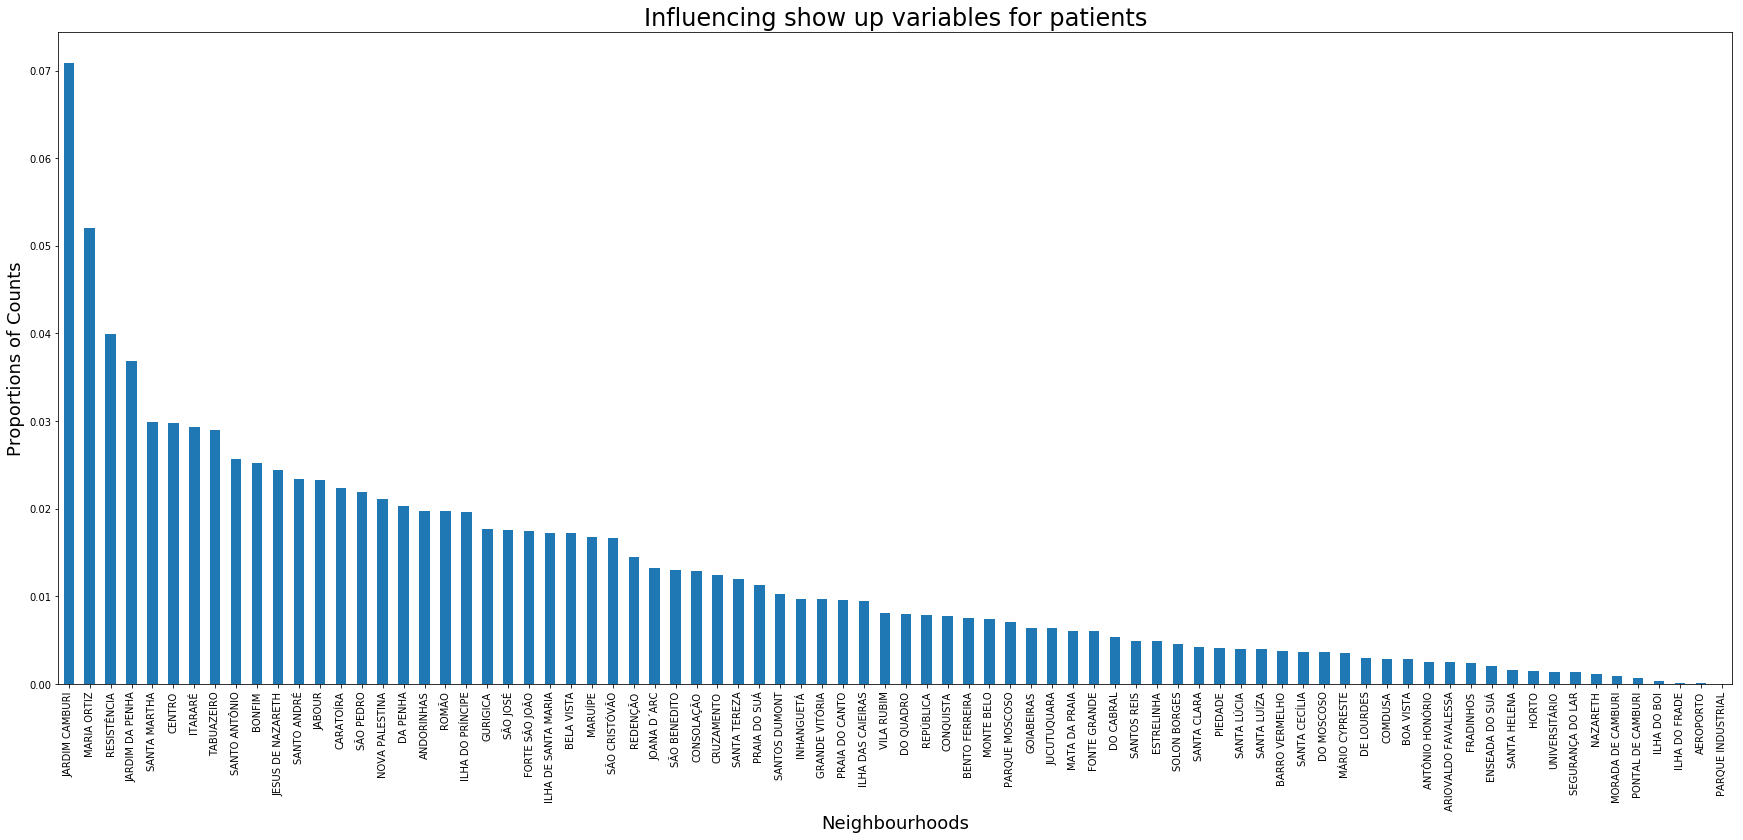

In [20]:
# Calculate the counts and proportions of the variable "Neighbourhood"
counts_neigh = df_show.Neighbourhood.value_counts()
counts_total_neigh = counts_neigh.sum()
proportions_neigh = counts_neigh / counts_total_neigh

# Plot proportions of the variable "Neighbourhood"
proportions_neigh.plot(kind='bar', figsize= (30,12));
plt.ylabel('Proportions of Counts', fontsize=18);
plt.xlabel('Neighbourhoods', fontsize=18);
plt.title('Influencing show up variables for patients', fontsize=24);

Additionally, we print the calculated counts and proportions of the column "Neighbourhood":

In [21]:
# Print counts
counts_neigh.head()

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: Neighbourhood, dtype: int64

In [22]:
# Print proportions
proportions_neigh.head()

JARDIM CAMBURI     0.070880
MARIA ORTIZ        0.051993
RESISTÊNCIA        0.039964
JARDIM DA PENHA    0.036801
SANTA MARTHA       0.029874
Name: Neighbourhood, dtype: float64

Result: We can see the visualization of proportions for the selected column "Neighbourhood". The most influencing variable of all bars is the value "JARDIM CAMBURI", which means the Neighbourhood place. It counts a value of 6252 and a proportion of 0.070880 (see blue bar). All results of this variable are dependent on the selected "No" masked variable "No_show".

#### For the third analysis (see: plot), we calculate the value-counts of the variable "Handicap" and plot the distribution of proportions of them. The results are dependent on the selected "No" masked variable "No_show". Please see below:

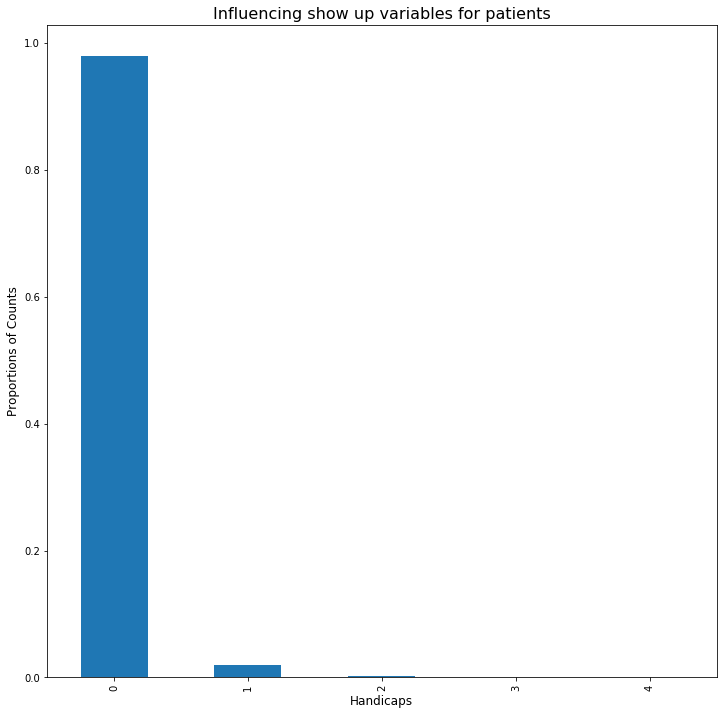

In [23]:
# Calculate the counts and proportions of the variable "Handicap"
counts_handicap = df_show.Handicap.value_counts()
counts_total_handicap = counts_handicap.sum()
proportions_handicap = counts_handicap / counts_total_handicap

# Plot proportions of the variable "Handicap"
proportions_handicap.plot(kind='bar', figsize=(12,12));
plt.ylabel('Proportions of Counts', fontsize=12);
plt.xlabel('Handicaps', fontsize=12);
plt.title('Influencing show up variables for patients', fontsize=16);

Additionally, we print the calculated counts and proportions of the column "Handicap":

In [24]:
# Print counts
counts_handicap

0    86372
1     1675
2      146
3       10
4        2
Name: Handicap, dtype: int64

In [25]:
# Print proportions
proportions_handicap

0    0.979219
1    0.018990
2    0.001655
3    0.000113
4    0.000023
Name: Handicap, dtype: float64

Result: We can see the visualization of proportions for the selected column "Handicap". The most influencing variable of all bars is the value "0" and secondly the value "1", which means: no Handicap (0) or one Handicap (1). "0" counts a value of 86372 and a proportion of 0.979219 (see blue bar). All results of this variable are dependent on the selected "No" masked variable "No_show".

#### For the fourth analysis (see: plot), we calculate the value-counts of the variable "Gender" and plot the distribution of proportions of them. The results are dependent on the selected "No" masked variable "No_show". Please see below:

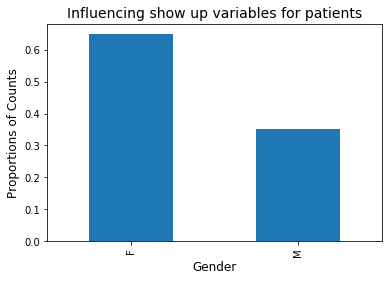

In [26]:
# Calculate the counts and proportions of the variable "Gender"
counts_gender = df_show.Gender.value_counts()
counts_total_gender = counts_gender.sum()
proportions_gender = counts_gender / counts_total_gender

# Plot proportions of the variable "Gender"
proportions_gender.plot(kind='bar');
plt.ylabel('Proportions of Counts', fontsize=12);
plt.xlabel('Gender', fontsize=12);
plt.title('Influencing show up variables for patients', fontsize=14);

In addition, a pie-plot clarifies the distribution of the "Gender" data even more clearly.

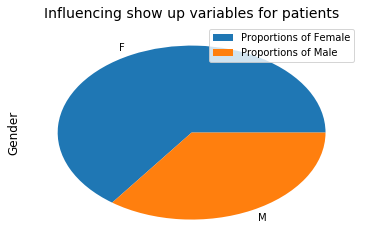

In [27]:
# Plot proportions of the variable "Gender"
proportions_gender.plot(kind='pie');
plt.ylabel('Gender', fontsize=12);
plt.title('Influencing show up variables for patients', fontsize=14);
plt.legend(('Proportions of Female','Proportions of Male'));

Additionally, we print the calculated counts and proportions of the column "Gender":

In [28]:
# Print counts
counts_gender

F    57243
M    30962
Name: Gender, dtype: int64

In [29]:
# Print proportions
proportions_gender

F    0.648977
M    0.351023
Name: Gender, dtype: float64

Result: We can see the visualization of proportions for the selected column "Gender". The most influencing variable of both bars is the value "F", which means: Female. It counts a value of 57243 and a proportion of 0.648977 (see blue bar). All results of this variable are dependent on the selected "No" masked variable "No_show".

#### For the fifth analysis (see: plot), we calculate the value-counts of the variable "Age" and plot the distribution of proportions of them. The results are dependent on the selected "No" masked variable "No_show". Please see below:

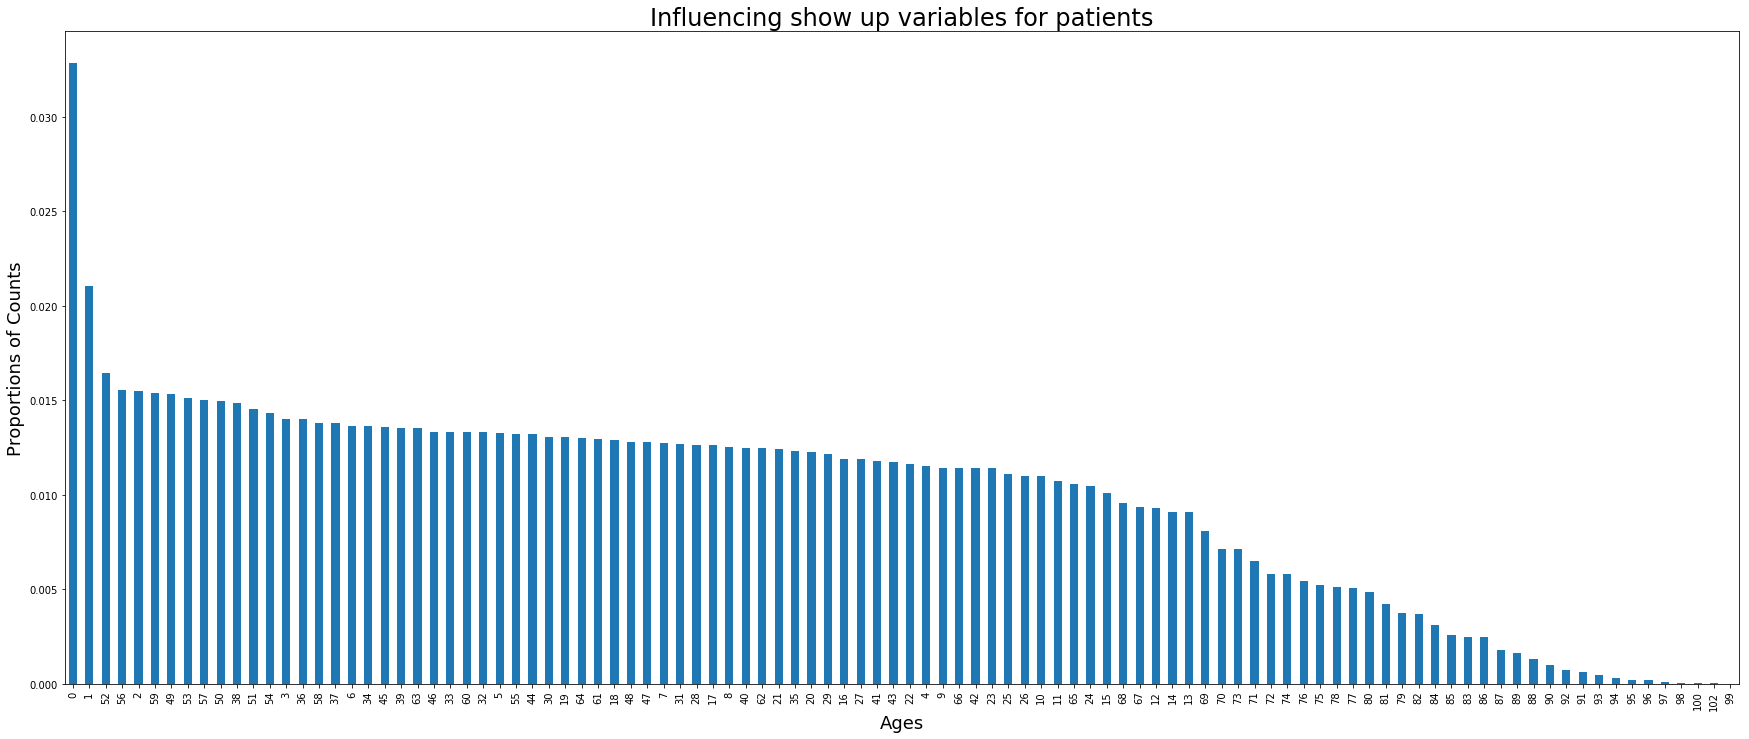

In [30]:
# Calculate the counts and proportions of the variable "Age"
counts_age = df_show.Age.value_counts()
counts_total_age = counts_age.sum()
proportions_age = counts_age / counts_total_age

# Plot proportions of the variable "Age"
proportions_age.plot(kind='bar', figsize= (30,12));
plt.ylabel('Proportions of Counts', fontsize=18);
plt.xlabel('Ages', fontsize=18);
plt.title('Influencing show up variables for patients', fontsize=24);

Additionally, we print the calculated counts and proportions of the column "Age":

In [31]:
# Print counts
counts_age.head(10)

0     2900
1     1858
52    1449
56    1372
2     1366
59    1357
49    1354
53    1332
57    1325
50    1322
Name: Age, dtype: int64

In [32]:
# Print proportions
proportions_age.head(10)

0     0.032878
1     0.021065
52    0.016428
56    0.015555
2     0.015487
59    0.015385
49    0.015351
53    0.015101
57    0.015022
50    0.014988
Name: Age, dtype: float64

To get further insights into the distribution of the "Age" values it is necessary to plot a histogram:

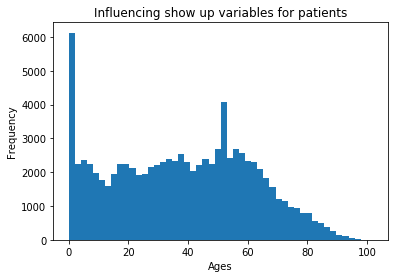

In [33]:
# Plot a histogram of the variable "Age"
df_show.Age.plot(kind='hist', bins=50);
plt.xlabel('Ages');
plt.title('Influencing show up variables for patients', fontsize=12);

Result: We can see the visualization of proportions for the selected column "Age". The most influencing values of all bars are the Ages "0", "1" and "52". The Age "0" counts a value of 2900 and a proportion of 0.032878 (see first left blue bar). Additionally, the histogram illustrates this distribution of value "Ages" as well. All results of the "Age" variable are dependent on the selected "No" masked variable "No_show".

#### For the sixth analysis (see: plot), we calculate the value-counts of the variable "SMS_received" and plot the distribution of proportions of them. The results are dependent on the selected "No" masked variable "No_show". Please see below:

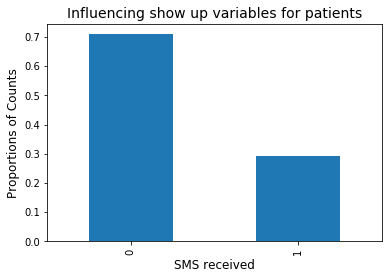

In [34]:
# Calculate the counts and proportions of the variable "SMS_received"
counts_sms = df_show.SMS_received.value_counts()
counts_total_sms = counts_sms.sum()
proportions_sms = counts_sms / counts_total_sms

# Plot proportions of the variable "SMS_received"
proportions_sms.plot(kind='bar');
plt.ylabel('Proportions of Counts', fontsize=12);
plt.xlabel('SMS received', fontsize=12);
plt.title('Influencing show up variables for patients', fontsize=14);

In addition, a pie-plot clarifies the distribution of the "SMS_received" data even more clearly.

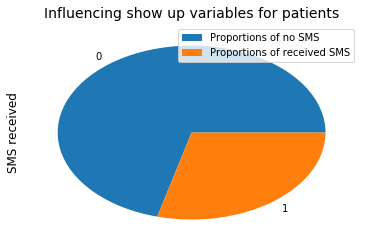

In [35]:
# Plot proportions of the variable "SMS_received"
proportions_sms.plot(kind='pie');
plt.ylabel('SMS received', fontsize=12);
plt.title('Influencing show up variables for patients', fontsize=14);
plt.legend(('Proportions of no SMS','Proportions of received SMS'));

Additionally, we print the calculated counts and proportions of the column "SMS_received":

In [36]:
# Print counts
counts_sms

0    62508
1    25697
Name: SMS_received, dtype: int64

In [37]:
# Print proportions
proportions_sms

0    0.708667
1    0.291333
Name: SMS_received, dtype: float64

Result: We can see the visualization of proportions for the selected column "SMS_received". The most influencing variable of both bars is the value "0", which means: No SMS received. It counts a value of 62508 and a proportion of 0.708667 (see left blue bar). All results of this variable "SMS_received" are dependent on the selected "No" masked variable "No_show".


<a id='conclusions'></a>
## Conclusions

This analysis deals with the question: What kind of patients do show up? As a dependent variable "No_show" was used and the other columns were used as independent variables. 

Through this analysis, the following results can be determined: The first analysis - based on the variables "Scholarship", "Hypertension", "Diabetes" and "Alcoholism" - shows that the variable "Hypertension" exerts the most intensive influence on patients who show up (based on: dependent variable "No_show"). The second analysis shows that within the "Neighborhood" variable, the value "JARDIM CAMBURI" has the strongest impact on patients who show up (based on: dependent variable "No_show"). The third analysis illustrates that within the variable "Handicap" the value "0" (no handicap) has the strongest impact on patients who show up (based on: dependent variable "No_show"). Likewise, the fourth analysis illustrates an influence of values of the variable "Gender": here the value "Female" exerts the greatest influence on patients who show up (based on: dependent variable "No_show"). In the fifth analysis, the value "0" (the age of the patient) of the variable "Age" influences patients who show up most intensely (based on: dependent variable "No_show"). In the final sixth analysis, the value "0" (no SMS from the patient) of the variable "SMS_received" has the strongest impact on patients who show up (based on: dependent variable "No_show"). 

In order to obtain more significant statistic results such as correlations and causalities, it is necessary to set and analyze all the variables with the most intense influence (as mentioned above). But during the analysis, it turned out that the variables cannot be compared due to their different data characteristics: The variables "Neighbourhood", "Handicap", "Gender" and "Age" have different data characteristics compared to the variables of the first analysis. Furthermore, the variable "Age" has partly unrealistic values, such as the age "0" or very high age values. Only the variable "SMS_received" could have been included in the first analysis because the data characteristics are identical. However, it should be noted that the values can also be the number of SMS received.

Nonetheless, for subsequent analysis including statistical tests, for example, it could be hypothesized that the disease "Hypertension" exerts the greatest influence on the appearance of a patient.

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0